# Week 3 -  Quick creash course on Qiskit <a class="tocSkip">
    (c) Ariel Guerreiro 2023

This notebook provides an introduction to quantum computing and quantum mechanics using Qiskit, an open-source quantum computing framework developed by IBM. The notebook covers basic quantum mechanics concepts such as superposition, entanglement, the uncertainty principle, and wave-particle duality, as well as quantum computing concepts such as qubits, quantum gates, quantum circuits, and quantum algorithms. The notebook also provides hands-on exercises using Qiskit to simulate and visualize quantum circuits and algorithms, including creating a quantum teleportation circuit and implementing the Grover's algorithm for searching an unstructured database. Overall, this notebook provides a solid introduction to the fundamentals of quantum computing and quantum mechanics using Qiskit, and is suitable for beginners with no prior knowledge in these areas.

# Qiskit overview <a name='overview'></a>

## What is Qiskit? <a name='what'></a>
Qiskit is an open-source quantum computing software development kit (SDK) for building and running quantum programs. It provides tools for simulating quantum circuits, optimizing them for specific quantum hardware, and running them on real quantum devices through IBM Quantum Experience. Qiskit consists of four main components: Terra, Aer, Ignis, and Aqua.

* Qiskit Terra provides the foundational tools for working with quantum circuits, including the ability to create quantum circuits, compile them to run on specific backends, and simulate their execution using a statevector or a density matrix.
* Qiskit Aer provides high-performance simulators that can simulate the execution of quantum circuits on classical hardware. It includes a statevector simulator, a density matrix simulator, and a QASM simulator that can simulate the effects of noise on a quantum system.
* Qiskit Ignis provides tools for mitigating the effects of noise on quantum circuits, including tools for calibrating and characterizing quantum hardware, and for implementing quantum error correction and fault-tolerant protocols.
* Qiskit Aqua provides higher-level tools for solving problems in optimization, machine learning, and quantum chemistry using quantum computing.


Qiskit was first released in March 2017 by IBM, and has since become one of the most widely used quantum computing SDKs. It has been used in a variety of applications, including quantum chemistry, optimization, cryptography, and more.

## Current capabilities of Qiskit <a name='capabilities'></a>
Qiskit provides a wide range of capabilities for working with quantum circuits, including:

* Support for quantum circuit design, simulation, and optimization using a variety of optimization algorithms and techniques.
* Integration with IBM Quantum Experience, which allows users to run their circuits on real quantum hardware.
* Tools for calibrating and characterizing quantum hardware, and for implementing quantum error correction and fault-tolerant protocols.
* Support for working with multipartite quantum registers and entangled states.
* High-performance simulators for simulating the effects of noise on quantum circuits.

## Installing Qiskit <a name='installing'></a>

To use Qiskit, we first need to install it on our computer. Qiskit can be installed using pip, a package manager for Python. We recommend using a virtual environment to manage your Qiskit installation.

Here are the steps to install Qiskit on Windows:

1. Install Anaconda for Python 3.7 or higher from the Anaconda website: https://www.anaconda.com/products/individual
2. Open Anaconda Prompt from the Windows Start menu.
3. Create a new virtual environment: conda create --name myenv
4. Activate the new environment: conda activate myenv
5. Install Qiskit: pip install qiskit
6. Verify the installation: python -c "import qiskit; print(qiskit.__version__)"

To install Qiskit on macOS or Linux, the steps are similar, but you can use the terminal instead of Anaconda Prompt.

## Using Colab from Google



In [1]:
#!pip install qiskit==0.44
!pip install qiskit==0.43

# Creating and measuring quantum states <a name='creating'></a>

## Preparing your notebook to run Qiskit

To start working with Qiskit in a Jupyter notebook, we need to first import the necessary packages. These packages include numpy, which is a library for the Python programming language that handles multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. We will also use math in some parts of the code.

The most important package for this notebook is Qiskit, the open-source framework for quantum computing that provides tools for creating and manipulating quantum programs, as well as running them on prototype quantum devices on IBM Q Experience or on simulators on a local computer. In addition, we will use the visualization tools provided by Qiskit to interpret the data. Finally, to enable interactive plotting within the Jupyter notebook, we can use the magic line introduced in previous notebooks.

In [2]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import random
import re  # regular expressions module

from qiskit import *
from qiskit.quantum_info import *

from qiskit import *
from qiskit.visualization import *
from qiskit.tools import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

With these packages imported, we are now ready to start creating and manipulating quantum states using Qiskit.

## Creating a register <a name='register'></a>


To some extent, a quantum computer is a versatile quantum system that can be used to emulate any other quantum system as long as it has enough memory. We will begin by implementing the simplest quantum system that can be emulated in a quantum computer: a two-level system, or in other words, a qubit.

The basic element needed for your first program is the QuantumCircuit. We begin by creating a QuantumRegister and a ClassicalRegister, which will serve as the quantum and classical memory of our circuit, respectively:

In [3]:
q_register = QuantumRegister(1)
c_register = ClassicalRegister(1)

The quantum register is basically the quantum system implemented on the quantum computer upon which we are going to operate, while the classical register is a classical mathematical variable upon which we shall store the results of measurements or perform classical computing.

In Qiskit, the QuantumRegister and ClassicalRegister classes are used to define the size of the quantum and classical registers in a quantum circuit. The QuantumRegister class takes a single argument, which is the number of qubits in the register, while the ClassicalRegister class takes a single argument, which is the number of classical bits in the register.

In general a quantum register is comprised by several qubits, while a classical register includes several classical bits. Each qubit in the quantum register is initialized to the state $|0\rangle$, while the classical bits in the classical register are initialized to the value 0.

## Building the circuit <a name='circuit'></a>

Once we have defined the quantum system in the form of a quantum register, we need to create a QuantumCircuit object. This object will represent a sequence of quantum operations that will act on the qubits in the register.

In our case, the QuantumCircuit object will consist of a timeline upon which we define the sequence of dynamical maps or transformations that act on the quantum system and alter its state.

To create a QuantumCircuit, we pass in the quantum register and the classical register objects we created earlier:

In [4]:
# Create a Quantum Circuit acting on a quantum register of 1 qubit
circuit1 = QuantumCircuit(q_register, c_register)

To visualize the circuit, we can use Qiskit's built-in draw function:

In [5]:
circuit1.draw()

q0: 
      
c0: 1/

This will display a visualization of the circuit in the form found in many textbooks. The circuit will consist of the quantum register, indexed as q0, which comprises a single qubit initialized to the state $|0\rangle$, and a classical register, indexed as c0, which consists of a classical bit initialized to the value 0.

This will display a graphical representation of the circuit using the matplotlib library.

## Single Qubit Quantum states <a name="single_states"/>

A single qubit quantum state can be written as

$$\left|\psi\right\rangle = \alpha\left|0\right\rangle + \beta \left|1\right\rangle$$


where $\alpha$ and $\beta$ are complex numbers. In a measurement the probability of the qubit being in $\left|0\right\rangle$ is $|\alpha|^2$ and $\left|1\right\rangle$ is $|\beta|^2$. As a vector this is

$$
\left|\psi\right\rangle =  
\begin{pmatrix}
\alpha \\
\beta
\end{pmatrix}.
$$

Note that, due to the conservation of probability, we have $|\alpha|^2+ |\beta|^2 = 1$ and since the global phase is undetectable $\left|\psi\right\rangle := e^{i\delta} \left|\psi\right\rangle$, we only require two real numbers to describe a single qubit quantum state.

A convenient representation is

$$\left|\psi\right\rangle = \cos(\theta/2)\left|0\right\rangle + \sin(\theta/2)e^{i\phi}\left|1\right\rangle$$

where $0\leq \phi < 2\pi$, and $0\leq \theta \leq \pi$.  From this, it is clear that there is a one-to-one correspondence between qubit states ($\mathbb{C}^2$) and the points on the surface of a unit sphere ($\mathbb{R}^3$). This is called the Bloch sphere representation of a qubit state.

Quantum gates/operations are usually represented as matrices. A gate that represents a physical quantum transformation on a qubit is represented by a $2\times 2$ unitary matrix $U$. The action of the quantum gate is found by multiplying the matrix representing the gate with the vector which represents the quantum state.

$$\left|\psi'\right\rangle = U\left|\psi\right\rangle$$

A general unitary must be able to take the $\left|0\right\rangle$ to the above state. That is

$$
U = \begin{pmatrix}
\cos(\theta/2) & a \\
e^{i\phi}\sin(\theta/2) & b
\end{pmatrix}
$$

where $a$ and $b$ are complex numbers constrained such that $U^\dagger U = I$ for all $0\leq\theta\leq\pi$ and $0\leq \phi<2\pi$. This gives 3 constraints and as such $a\rightarrow -e^{i\lambda}\sin(\theta/2)$ and $b\rightarrow e^{i\lambda+i\phi}\cos(\theta/2)$ where $0\leq \lambda<2\pi$ giving

$$
U = \begin{pmatrix}
\cos(\theta/2) & -e^{i\lambda}\sin(\theta/2) \\
e^{i\phi}\sin(\theta/2) & e^{i\lambda+i\phi}\cos(\theta/2)
\end{pmatrix}.
$$

This is the most general form of a single qubit unitary transformation.

## Manipulate the initial state <a name='manipulate'></a>

After you create the circuit with its registers, you can add gates (i.e., maps, transformations or operations) to manipulate the registers. As you proceed through the tutorials you will find more gates and circuits.

As a first example, you are going to create the state in the single qubit regiter

$$|\psi\rangle = \left(|0\rangle+|1\rangle\right)/\sqrt{2}.$$

To create such a state, we start with the register initialized to $|0\rangle$ and apply a Hadamard gate $H$, which puts it into the superposition state $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.

On an ideal quantum computer, the state produced by running this circuit would be $\left(|0\rangle+|1\rangle\right)/\sqrt{2}$.

In [6]:
from qiskit.visualization import circuit_drawer
# Add a H gate on qubit 0, putting this qubit in superposition.
circuit1.h(0)
circuit1.draw()

┌───┐
  q0: ┤ H ├
      └───┘
c0: 1/═════

## Measure the quantum state <a name='measure'></a>

To complete this first example using Qiskit, we will perform a measurement of state of the quantum register and store the result in the classical register.

In [7]:
circuit1.measure(q_register,c_register)
circuit1.draw()

┌───┐┌─┐
  q0: ┤ H ├┤M├
      └───┘└╥┘
c0: 1/══════╩═
            0

In Qiskit, operations can be added to the circuit one by one, as shown by this example. Notice that both the Hadamard gate and the measurement can be understood as maps: the first between two quantum states, and the second from a quantum state into a classical state.

For now the measurements will be restricted to detecting whether the qubit is in the state $|0>$ or in the state $|1>$.

## Running the quantum circuit and getting the results<a name='running'></a>

So far we have defined the quantum circuit, from the initialization of the registers, followed by some operations, and endding on a measurement. This does not mean that any operations or calculations have been done, but rather we have written the program with the sequence of intructions to be performed.

Like in the case of a classical computer, it is now time to run the quantum circuit.Qiskit allows two ways of doing so: the first is running the circuit on the actual quantum computer by remotly tapping into IBM's quantum computers, and the second is using a simulator that emulates an ideal quantum computer.

Aer: provides access to several simulators that are included with Qiskit and run on your local machine.

* `qasm_simulator`: This simulator supports multiple simulation methods and configurable options for each simulation method.

* `statevector_simulator`: This simulator returns the quantum state, which is a complex vector of dimensions  $2n$ , where  $n$  is the number of qubits (so be careful using this as it will quickly get too large to run on your machine). Ideal quantum circuit

* `unitary_simulator`: This simulator works provided all the elements in the circuit are unitary operations and  calculates the  $2^n\times2^n$  matrix representing the gates in the quantum circuit.

* `clifford_simulator`: This simulator is based on the Gottesman–Knill theorem that states that stabilizer circuits, i.e., circuits that only consist of gates from the normalizer of the qubit Pauli group, also called Clifford group, can be perfectly simulated in polynomial time on a probabilistic classical computer. The Clifford group can be generated solely by using CNOT, Hadamard, and phase gates and therefore stabilizer circuits can be constructed using only these gates.

Some of these simulations have a python implementation: qasm_simulator_py and statevector_simulator_py.

simulator = Aer.get_backend('qasm_simulator')
result = execute(circuit1,backend=simulator).result()
counts = result.get_counts(circuit1)
plot_histogram(counts)

There is an alternate function for plotting histograms when running in a Jupyter notebook. This function `iplot_histogram()` is made using an externally hosted JS library for use in Jupyter notebooks. The interactive plot can only be used if you're running inside a Jupyter notebook and only if you have external connectivity to the host with the JS library. If you use `iplot_histogram()` outside of a Jupyter notebook it will fail.

Also notice that the backend parameter  in the execute function specifies where the circuit should be run, whether on a real quantum device or a simulator.

## Visualizing the quantum state

In many situations you want to see the state of a quantum computer. This could be for debugging. Here we assume you have this state (either from simulation or state tomography) and the goal is to visualize the quantum state. This requires exponential resources, so we advise to only view the state of small quantum systems. There are several functions for generating different types of visualization of a quantum state

```
plot_state_city(quantum_state)
plot_state_paulivec(quantum_state)
plot_state_qsphere(quantum_state)
plot_state_hinton(quantum_state)
plot_bloch_multivector(quantum_state)
```

A quantum state is either a state matrix $\rho$ (Hermitian matrix) or statevector $|\psi\rangle$ (complex vector). The state matrix is related to the statevector by

$$\rho = |\psi\rangle\langle \psi|,$$

and is more general as it can represent mixed states (positive sum of statevectors)

$$\rho = \sum_k p_k |\psi_k\rangle\langle \psi_k |.$$

The visualizations generated by the functions are:
- `'plot_state_city'`: The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city.
- `'plot_state_qsphere'`: The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different `'qsphere'` for each component.
- `'plot_state_paulivec'`: The representation of the state matrix using Pauli operators as the basis $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$.
- `'plot_state_hinton'`: Same as `'city'` but where the size of the element represents the value of the matrix element.
- `'plot_bloch_multivector'`: The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.

[1.+0.j 0.+0.j]


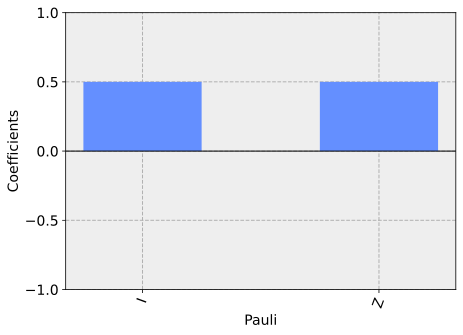

In [8]:
# Create a Quantum Circuit acting on a quantum register of 1 qubits
circuit2 = QuantumCircuit(1)
# execute the quantum circuit
simulator = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circuit2, simulator).result()
outputstate = result.get_statevector(circuit2, decimals=3)

print(outputstate)

plot_state_city(outputstate)

plot_state_hinton(outputstate)

plot_state_qsphere(outputstate)

plot_bloch_multivector(outputstate, title="State in the Bloch sphere")
plot_bloch_multivector(outputstate)

plot_state_paulivec(outputstate)

Just like with `plot_histogram()` there is a second set of functions for each of the functions to plot the quantum state. These functions have the same name but with a prepended `i`:

```
iplot_state_city(quantum_state)
iplot_state_paulivec(quantum_state)
iplot_state_qsphere(quantum_state)
iplot_state_hinton(quantum_state)
iplot_bloch_multivector(quantum_state)
```

These functions are made using an externally hosted JS library for use in Jupyter notebooks. The interactive plot can only be used if you're running inside a Jupyter notebook and only if you have external connectivity to the host with the JS library. If you use these functions outside of a Jupyter notebook it will fail.

# Multipartite registers<a name="multipartite"/>

## Basis vector ordering in Qiskit

Within the physics community, the qubits of a multi-qubit systems are typically ordered with the first qubit on the left-most side of the tensor product and the last qubit on the right-most side. For instance, if the first qubit is in state $\left|0\right\rangle$ and second is in state $\left|1\right\rangle$, their joint state would be $\left|01\right\rangle$. Qiskit uses a slightly different ordering of the qubits, in which the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. For the example just given, the joint state would be represented as $\left|10\right\rangle$. Importantly, *this change in the representation of multi-qubit states affects the way multi-qubit gates are represented in Qiskit*, as discussed below.

The representation used in Qiskit enumerates the basis vectors in increasing order of the integers they represent. For instance, the basis vectors for a 2-qubit system would be ordered as $\left|00\right\rangle$, $\left|01\right\rangle$, $\left|10\right\rangle$, and $\left|11\right\rangle$. Thinking of the basis vectors as bit strings, they encode the integers 0,1,2 and 3, respectively.

## Arbitrary initialization <a name="initialization"/>
What if we want to initialize a qubit register to an arbitrary state? An arbitrary state for $n$ qubits may be specified by a vector of $2^n$ amplitudes, where the sum of amplitude-norms-squared equals 1. For example, the following three-qubit state can be prepared:

$$\left|\psi\right\rangle = \frac{i}{4}\left|000\right\rangle + \frac{1}{\sqrt{8}}\left|001\right\rangle + \frac{1+i}{4}\left|010\right\rangle + \frac{1+2i}{\sqrt{8}}\left|101\right\rangle + \frac{1}{4}\left|110\right\rangle$$


Remember that when representing the state of a multi-qubit system, the tensor order used in Qiskit is different than that used in most physics textbooks. Suppose there are  $n$  qubits, and qubit  $𝑗$  is labeled as  $Q_j$. Qiskit uses an ordering in which the  𝑛th  qubit is on the left side of the tensor product, so that the basis vectors are labeled as  $Q_n⋯\otimes Q_1\otimes Q_0$ .

For example, if qubit zero is in state 0, qubit 1 is in state 0, and qubit 2 is in state 1, Qiskit would represent this state as  $|100⟩$ , whereas many physics textbooks would represent it as  $|001⟩$ .

Furhtermore, the ordering of a multiple qubit basis is
$$\{|000⟩,|001⟩,|010⟩,|011⟩,|100⟩,|101⟩,|110⟩,|111⟩\}$$

and therefore the vector is

$$(\frac{i}{4},\frac{1}{\sqrt{8}}, \frac{1+i}{4},0,0, \frac{1+2i}{\sqrt{8}}, \frac{1}{4},0).$$

In [9]:
# Initializing a three-qubit quantum state
desired_vector = [
    1 / mt.sqrt(16) * complex(0, 1),
    1 / mt.sqrt(8) * complex(1, 0),
    1 / mt.sqrt(16) * complex(1, 1),
    0,
    0,
    1 / mt.sqrt(8) * complex(1, 2),
    1 / mt.sqrt(16) * complex(1, 0),
    0]


q = QuantumRegister(3)

circuit3 = QuantumCircuit(q)

circuit3.initialize(desired_vector, [q[0],q[1],q[2]])
circuit3.draw()

┌───────────────────────────────────────────────────────────────────┐
q1_0: ┤0                                                                  ├
      │                                                                   │
q1_1: ┤1 Initialize(0.25j,0.35355,0.25+0.25j,0,0,0.35355+0.70711j,0.25,0) ├
      │                                                                   │
q1_2: ┤2                                                                  ├
      └───────────────────────────────────────────────────────────────────┘

In [10]:
# execute the quantum circuit
simulator = BasicAer.get_backend('statevector_simulator') # the device to run on
result = execute(circuit3, simulator).result()
outputstate = result.get_statevector(circuit3, decimals=3)

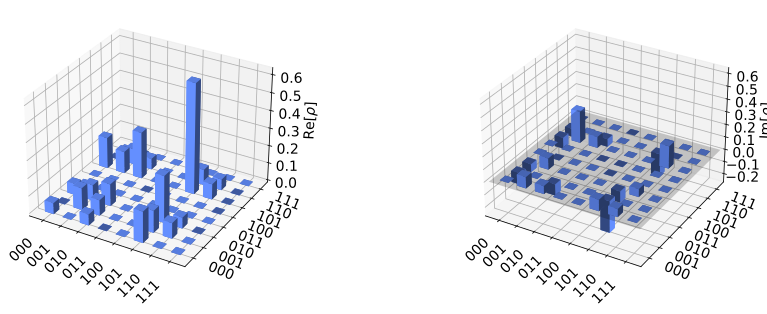

In [11]:
plot_state_city(outputstate)

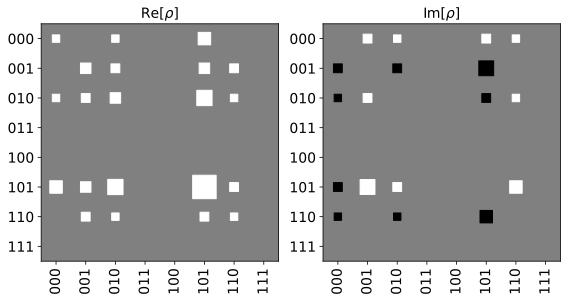

In [12]:
plot_state_hinton(outputstate)

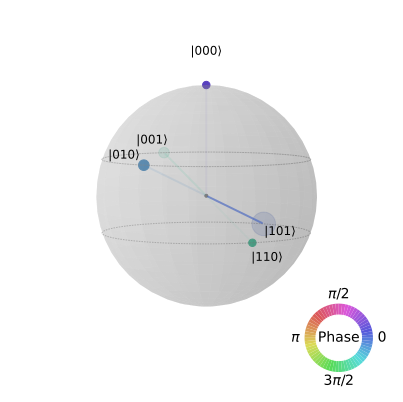

In [13]:
plot_state_qsphere(outputstate)

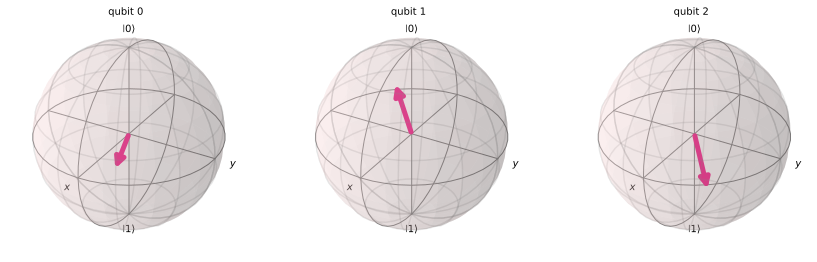

In [14]:
plot_bloch_multivector(outputstate)

## Mixed states <a name='mixed'></a>


Until now we have been focusing on pure states. In other words states about which we have perfect information. But, as mentioned in the lecture notes, when information is not perfect and one cannot identify exactly the quantum state of a system, we need to use mixed states. So the main question is whether there is a way to represent a mixture of quantum states in Qiskit and if so, how?

The exact answer is no,  but actually there  are ways around this. For example, by 'purifying' the state.  State purification refers to the fact that every mixed state acting on finite-dimensional Hilbert spaces can be viewed as the reduced state of some pure state.

For example, suppose we wanted work with the mixture

$$\rho=p_0|0⟩⟨0|+p_+|+⟩⟨+|.$$

You could do this by creating the entangled state

$$\psi=\sqrt(p_0)|00⟩ + \sqrt(p_+)|1+⟩,$$

with $|00⟩ = |0⟩_A \otimes |0⟩_B$.

In this, each term represents a term from the desired mixed state. The state of the rightmost qubit in each term corresponds to one from the desired mixture. Each term has a unique state from an orthonormal basis on the left most qubit. The amplitude for each term is the square root of the corresponding probability from the mixture.

Given these properties, the reduced density matrix for the rightmost qubit behaves exactly as the desired mixed state. We just need to leave the leftmost qubit out of any gates we perform, and not measure it at the end.

$$\rho_{AB}=p_0|00⟩⟨00| + p_+|1+⟩⟨1+|+\sqrt(p_+ p_o)|00⟩⟨1+|+ \sqrt(p_+ p_o)|1+⟩⟨00|$$

By tracing the subsystem A we get

$$\rho_{AB}=p_0|00⟩⟨00| + p_+|1+⟩⟨1+|$$

which is precisely the density matrix for the intended mixed state.

Let us start with a first exercise: we consider a 3 qubit register and use the first qubit to purify the other two. Then, we produce a superposition of states between qubits 1 and 2, and chech the difference in results whether or not we measure the first quibit.

In [15]:
# Create a Quantum Circuit acting on a quantum register of 2 qubits and 2
q = QuantumRegister(3)
c = ClassicalRegister(3)

circuit4 = QuantumCircuit(q,c)
p0=0.2
p1=1-p0

desired_vector = [
    mt.sqrt(p0) * complex(1, 0),
    0,
    mt.sqrt(p1/2) * complex(1, 0),
    mt.sqrt(p1/2) * complex(1, 0),
    0,
    0,
    0,
    0]

circuit4.initialize(desired_vector, [q[0],q[1],q[2]])

# Add a CX (CNOT) gate on control qubit 1 and target qubit 2, putting
# the qubits in a Bell state.
circuit4.cx(1, 2)
circuit4.barrier()


circuit4.measure(1,1)
circuit4.measure(2,2)

q = QuantumRegister(3)
c = ClassicalRegister(3)

circuit5 = QuantumCircuit(q,c)
circuit5.initialize(desired_vector, [q[0],q[1],q[2]])

# Add a CX (CNOT) gate on control qubit 1 and target qubit 2, putting
# the qubits in a Bell state.
circuit5.cx(1, 2)
circuit5.barrier()


circuit5.measure(0,0)
circuit5.measure(1,1)
circuit5.measure(2,2)

In [16]:
circuit4.draw()

┌────────────────────────────────────────────────┐      ░       
q29_0: ┤0                                               ├──────░───────
       │                                                │      ░ ┌─┐   
q29_1: ┤1 Initialize(0.44721,0,0.63246,0.63246,0,0,0,0) ├──■───░─┤M├───
       │                                                │┌─┴─┐ ░ └╥┘┌─┐
q29_2: ┤2                                               ├┤ X ├─░──╫─┤M├
       └────────────────────────────────────────────────┘└───┘ ░  ║ └╥┘
 c1: 3/═══════════════════════════════════════════════════════════╩══╩═
                                                                  1  2

In [17]:
circuit5.draw()

┌────────────────────────────────────────────────┐      ░ ┌─┐      
q30_0: ┤0                                               ├──────░─┤M├──────
       │                                                │      ░ └╥┘┌─┐   
q30_1: ┤1 Initialize(0.44721,0,0.63246,0.63246,0,0,0,0) ├──■───░──╫─┤M├───
       │                                                │┌─┴─┐ ░  ║ └╥┘┌─┐
q30_2: ┤2                                               ├┤ X ├─░──╫──╫─┤M├
       └────────────────────────────────────────────────┘└───┘ ░  ║  ║ └╥┘
 c2: 3/═══════════════════════════════════════════════════════════╩══╩══╩═
                                                                  0  1  2

{'000': 2059, '110': 7941}
{'110': 4016, '000': 2037, '111': 3947}


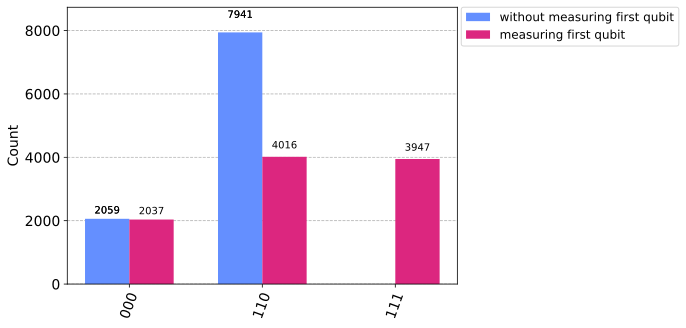

In [18]:
# Create an AerSimulator instance
simulator = Aer.get_backend('aer_simulator')

# Execute circuit4 on the simulator
result4 = execute(circuit4, backend=simulator, shots=10000).result()
count4 = result4.get_counts(circuit4)

# Execute circuit5 on the simulator
result5 = execute(circuit5, backend=simulator, shots=10000).result()
count5 = result5.get_counts(circuit5)

# Print the counts
print(count4)
print(count5)

# Plot the histograms
plot_histogram([count4, count5], legend=['without measuring first qubit', 'measuring first qubit'])

The analysis of the previous plot is very interesting:
If you do not measure the first qubit, the corresponding classical bit is always zero and therefore all the probability is concentrated in the first two situations. This is the result of a mixed state, where we have not obtained any information about the first qubit and therefore there is some statistial probability of it either being $|0>$ or $|1>$. On the other hand, when measuring the first qubit, we can discreminate between these two situations. Not surprisingly, the probability of $P_{110}$ for the case where you do not measure the first qubit is identical to the sum of $P_{110}$ and $P_{111}$ when you measure all the qubits.

# Maps, transformations and gates <a name='maps'></a>

When writing a quantum circuit you can use many quantum gate (unitary operator) that you like, along with a collection of non-gate operations, such as qubit measurements and reset operations.

For example, the `u*` gates represent arbitrary single-qubit rotations of one, two, and three angles.  The `u1` gates are single-parameter rotations that represent generalized phase gates of the form

$$
U_{1}(\lambda) = \begin{bmatrix}
1 & 0 \\
0 & e^{i\lambda}
\end{bmatrix}
$$

This set includes common gates such as $Z$, $T$, $T^{\dagger}$, $S$, and $S^{\dagger}$.  It turns out that these gates do not actually need to be performed on hardware, but instead, can be implemented in software as "virtual gates".  These virtual gates are called "frame changes" and take zero time, and have no associated error; they are free gates on hardware.

Two-angle rotations, $U_{2}(\phi,\lambda)$, are actually two frame changes with a single $X_{\pi/2}$ gate in between them, and can be used to synthesize gates like the Hadamard ($U_{2}(0,\pi)$) gate.  As the only actual gate performed is the $X_{\pi/2}$ gate, the error and gate time associated with any $U_{2}$ gate is the same as an $X_{\pi/2}$ gate.  Similarly, $U_{3}(\theta,\phi,\lambda)$ gates are formed from three frame changes with two $X_{\pi/2}$ gates in between them.  The errors and gate times are twice those of a single $X_{\pi/2}$.  The identity gate, $id$, is straightforward, and is a placeholder gate with a fixed time-interval.

The only entangling gate supported by the IBM Q devices is the CNOT gate (`cx`) which, in the computational basis, can be written as:

$$
\mathrm{CNOT}(0,1) = \begin{bmatrix}
1 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
0 & 1 & 0 & 0
\end{bmatrix}
$$

where the matrix form above follows from the specific bit-ordering convention used in Qiskit.
Every quantum circuit run on an IBM Q device must be expressed using only these basis gates.

## Single qubit gates <a name='singlegate'></a>

The single-qubit gates available are:
- u gates
- Identity gate
- Pauli gates
- Clifford gates
- $C3$ gates
- Standard rotation gates

In this lecture we shall focus on the first two types of gates.

We have provided a backend: `unitary_simulator` to allow you to calculate the unitary matrices.

### u gates

In Qiskit we give you access to the general unitary using the $u3$ gate

$$
u3(\theta, \phi, \lambda) = U(\theta, \phi, \lambda)
$$

The $u2(\phi, \lambda) =u3(\pi/2, \phi, \lambda)$ gate has the matrix form

$$
u2(\phi, \lambda) =
\frac{1}{\sqrt{2}} \begin{pmatrix}
1 & -e^{i\lambda} \\
e^{i\phi} & e^{i(\phi + \lambda)}
\end{pmatrix}.
$$

This is a useful gate as it allows us to create superpositions.

The $u1(\lambda)= u3(0, 0, \lambda)$ gate has the matrix form

$$
u1(\lambda) =
\begin{pmatrix}
1 & 0 \\
0 & e^{i \lambda}
\end{pmatrix},
$$

which is useful as it allows us to apply a quantum phase.

### Identity gate

The identity gate is $Id = u0(1)$.

## Multi-Qubit Gates <a name="multi_gates"/>

The space of a quantum computer grows exponential with the number of qubits. For $n$ qubits the complex vector space has dimensions $d=2^n$. To describe states of a multi-qubit system, the tensor product is used to "glue together" operators and basis vectors.

Let's start by considering a 2-qubit system. Given two operators $A$ and $B$ that each act on one qubit, the joint operator $A \otimes B$ acting on two qubits is


$$
	A\otimes B =
	\begin{pmatrix}
		A_{00} \begin{pmatrix}
			B_{00} & B_{01} \\
			B_{10} & B_{11}
		\end{pmatrix} & A_{01}
        \begin{pmatrix}
				B_{00} & B_{01} \\
				B_{10} & B_{11}
			\end{pmatrix} \\
		A_{10} 	\begin{pmatrix}
					B_{00} & B_{01} \\
					B_{10} & B_{11}
				\end{pmatrix} & A_{11}
                \begin{pmatrix}
							B_{00} & B_{01} \\
							B_{10} & B_{11}
						\end{pmatrix}
	\end{pmatrix}
$$

where $A_{jk}$ and $B_{lm}$ are the matrix elements of $A$ and $B$, respectively.

Analogously, the basis vectors for the 2-qubit system are formed using the tensor product of basis vectors for a single qubit:

$$
\begin{split}
	\left|{00}\right\rangle &= \begin{pmatrix}
		1 \begin{pmatrix}
			1  \\
			0
		\end{pmatrix} \\
		0 \begin{pmatrix}
			1  \\
			0
		\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 1 \\ 0 \\ 0 \\0 \end{pmatrix}~~~\left|{01}\right\rangle = \begin{pmatrix}
	1 \begin{pmatrix}
	0 \\
	1
	\end{pmatrix} \\
	0 \begin{pmatrix}
	0  \\
	1
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix}0 \\ 1 \\ 0 \\ 0 \end{pmatrix}\end{split}
$$
    
$$
\begin{split}\left|{10}\right\rangle = \begin{pmatrix}
	0\begin{pmatrix}
	1  \\
	0
	\end{pmatrix} \\
	1\begin{pmatrix}
	1 \\
	0
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 1 \\ 0 \end{pmatrix}~~~ 	\left|{11}\right\rangle = \begin{pmatrix}
	0 \begin{pmatrix}
	0  \\
	1
	\end{pmatrix} \\
	1\begin{pmatrix}
	0  \\
	1
	\end{pmatrix}
	\end{pmatrix} = \begin{pmatrix} 0 \\ 0 \\ 0 \\1 \end{pmatrix}\end{split}
$$

Note we've introduced a shorthand for the tensor product of basis vectors, wherein $\left|0\right\rangle \otimes \left|0\right\rangle$ is written as $\left|00\right\rangle$. The state of an $n$-qubit system can be described using the $n$-fold tensor product of single-qubit basis vectors. Notice that the basis vectors for a 2-qubit system are 4-dimensional; in general, the basis vectors of an $n$-qubit sytsem are $2^{n}$-dimensional, as noted earlier.

#### Controlled-X (or, controlled-NOT) gate
The controlled-not gate flips the `target` qubit when the control qubit is in the state $\left|1\right\rangle$. If we take the MSB as the control qubit (e.g. `cx(q[1],q[0])`), then the matrix would look like

$$
C_X =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 1 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0
\end{pmatrix}.
$$

However, when the LSB is the control qubit, (e.g. `cx(q[0],q[1])`), this gate is equivalent to the following matrix:

$$
C_X =
\begin{pmatrix}
1 & 0 & 0 & 0\\
0 & 0 & 0 & 1\\
0 & 0 & 1 & 0\\
0 & 1 & 0 & 0
\end{pmatrix}.
$$



## Non unitary operations <a name="non_unitary"/>

Now that we have gone through all the unitary operations in quantum circuits, we also have access to non-unitary operations. These include measurements, reset of qubits, and classical conditional operations.

In [19]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

### Measurements

We don't have access to all the information when we make a measurement in a quantum computer. The quantum state is projected onto the standard basis. Below are two examples showing a circuit that is prepared in a basis state and the quantum computer prepared in a superposition state.

In [20]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw()

┌─┐
 q39: ┤M├
      └╥┘
c3: 1/═╩═
       0

In [21]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'0': 1024}

 The simulator predicts that 100 percent of the time the classical register returns 0.

In [22]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw()

┌───┐┌─┐
 q39: ┤ H ├┤M├
      └───┘└╥┘
c3: 1/══════╩═
            0

In [23]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'1': 511, '0': 513}

 The simulator predicts that 50 percent of the time the classical register returns 0 or 1.

### Reset
It is also possible to `reset` qubits to the $\left|0\right\rangle$ state in the middle of computation. Note that `reset` is not a Gate operation, since it is irreversible.

In [24]:
qc = QuantumCircuit(q, c)
qc.reset(q[0])
qc.measure(q, c)
qc.draw()

┌─┐
 q39: ─|0>─┤M├
           └╥┘
c3: 1/══════╩═
            0

In [25]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'0': 1024}

In [26]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.reset(q[0])
qc.measure(q, c)
qc.draw()

┌───┐     ┌─┐
 q39: ┤ H ├─|0>─┤M├
      └───┘     └╥┘
c3: 1/═══════════╩═
                 0

In [27]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'0': 1024}

Here we see that for both of these circuits the simulator always predicts that the output is 100 percent in the 0 state.

### Conditional operations
It is also possible to do operations conditioned on the state of the classical register

In [28]:
qc = QuantumCircuit(q, c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw()

┌───┐ ┌─┐
 q39: ─┤ X ├─┤M├
       └─╥─┘ └╥┘
      ┌──╨──┐ ║ 
c3: 1/╡ 0x0 ╞═╩═
      └─────┘ 0

Here the classical bit always takes the value 0 so the qubit state is always flipped.

In [29]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'1': 1024}

In [30]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q,c)
qc.x(q[0]).c_if(c, 0)
qc.measure(q,c)
qc.draw()

┌───┐┌─┐ ┌───┐ ┌─┐
 q39: ┤ H ├┤M├─┤ X ├─┤M├
      └───┘└╥┘ └─╥─┘ └╥┘
            ║ ┌──╨──┐ ║ 
c3: 1/══════╩═╡ 0x0 ╞═╩═
            0 └─────┘ 0

In [31]:
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'1': 1024}

Here the classical bit by the first measurement is random but the conditional operation results in the qubit being deterministically put into $\left|1\right\rangle$.

# Basic quantum physics with Qiskit <a name='quantumphysics'></a>

## Colapse of the wave function <a name='colapse'></a>


One of the fundamental concepts in quantum mechanics is the wave function, which describes the state of a quantum system. The wave function can take different forms depending on the specific system, but it always contains all the information about the probabilities of different outcomes that can be observed upon measurement.

The collapse of the wave function refers to the phenomenon where the act of measuring a quantum system forces the wave function to "collapse" into one of its possible outcomes. Prior to measurement, the system is in a superposition of all possible states, each with a corresponding probability amplitude. However, when a measurement is made, the wave function collapses to a single state with a probability given by the Born rule.

To demonstrate the collapse of the wave function, we can use Qiskit to create a simple circuit that puts a qubit into superposition and then measures it. In this case, we use a single qubit and two classical bits to record the measurement outcomes:

In [32]:
# Create a Quantum Circuit acting on a quantum register of 1 qubits and 2 bits
circuit = QuantumCircuit(1,2)

# Add a H gate on qubit 0, putting this qubit in superposition.
circuit.h(0)

# Measure the qubit and store the result in two classical bits.
circuit.measure(0,0)
circuit.measure(0,1)

# Draw the circuit diagram
circuit.draw()

┌───┐┌─┐┌─┐
  q: ┤ H ├┤M├┤M├
     └───┘└╥┘└╥┘
c: 2/══════╩══╩═
           0  1

The circuit first applies a Hadamard gate (H) to the qubit, which puts it in an equal superposition of $|0\rangle$ and $|1\rangle$. Then, two classical bits are used to record the measurement outcomes. Finally, the circuit is drawn using circuit.draw(output="mpl").

To simulate the circuit, we use the Qiskit Aer simulator and plot the measurement results using a histogram:

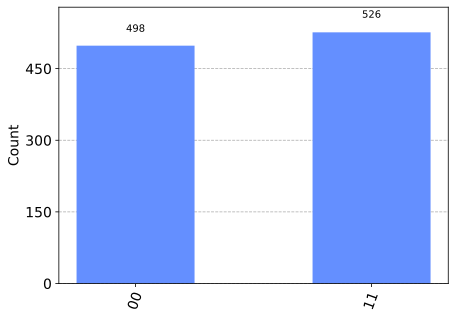

In [33]:
# Use the Qiskit Aer simulator
simulator = Aer.get_backend('qasm_simulator')

# Execute the circuit on the simulator
result = execute(circuit, backend=simulator).result()

# Plot the measurement outcomes
plot_histogram(result.get_counts(circuit))


The resulting histogram should show that the qubit is measured in either $|0\rangle$ or $|1\rangle$ with equal probability, demonstrating the collapse of the wave function.

# Decoherence and noise <a name='Noise'></a>



Decoherence refers to the loss of quantum coherence in a quantum system due to its interaction with its environment. In quantum mechanics, the evolution of a quantum state is described by a unitary transformation, but when a quantum system is coupled to its environment, its evolution becomes non-unitary and irreversible. This results in the loss of quantum coherence and the appearance of classical-like behavior.

Noise in quantum systems refers to any unwanted external influence that can disturb the quantum state and result in errors or inaccuracies in measurements. Examples of noise in quantum systems include thermal noise, which arises from the random motion of atoms and molecules in the environment, and electrical noise, which can arise from fluctuations in electromagnetic fields.

Emulating decoherence in Qiskit simulations is crucial because it allows us to study the effects of noise on quantum algorithms and to develop strategies to mitigate those effects. Decoherence arises from the interaction of a quantum system with its environment, which leads to a loss of coherence and information, and can cause errors in quantum computations.

In Qiskit, decoherence is typically modeled using a noise model that consists of a set of quantum errors that describe the effects of noise and imperfections in a quantum computer. These errors can include gate errors, measurement errors, and initialization errors, among others. By adding these errors to a simulation, we can study the impact of noise on a quantum algorithm and evaluate the effectiveness of error mitigation techniques.

In quantum computing, a common type of noise is the bit flip error, which occurs when a qubit spontaneously flips from a 0 state to a 1 state or vice versa. The Qiskit model for bit flip noise involves adding a stochastic error to the ideal unitary gate, resulting in a probabilistic mixture of the ideal gate and the identity gate. This model is used to simulate the effects of noise on quantum circuits and to test the robustness of quantum algorithms against noise.


Let us provide a simple example of bit flip error:

In [34]:
from qiskit.providers.aer import AerSimulator

# Qiskit Aer noise module imports
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors import QuantumError, ReadoutError
from qiskit.providers.aer.noise.errors import pauli_error
from qiskit.providers.aer.noise.errors import depolarizing_error
from qiskit.providers.aer.noise.errors import thermal_relaxation_error

# System Specification
n_qubits = 2
circuit8 = QuantumCircuit(n_qubits, n_qubits)

# Test Circuit
circuit8.h(0)
for qubit in range(n_qubits - 1):
    circuit8.cx(qubit, qubit + 1)

circuit8.barrier()
circuit8.measure(range(n_qubits), range(n_qubits))

# Simulator
simulator = AerSimulator()

circuit8.draw()

┌───┐      ░ ┌─┐   
q_0: ┤ H ├──■───░─┤M├───
     └───┘┌─┴─┐ ░ └╥┘┌─┐
q_1: ─────┤ X ├─░──╫─┤M├
          └───┘ ░  ║ └╥┘
c: 2/══════════════╩══╩═
                   0  1

<div class="alert alert-block alert-info">
<b>Question 1:</b> Can you tell which state is generated by this circuit? Is this a relevant state? Why?
</div>

To facilitate comparison, we start by simulating the outcome in the absence of noise.

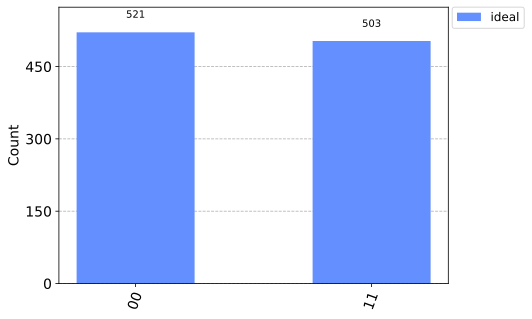

In [35]:
# Ideal execution
job = execute(circuit8, simulator)
result_ideal = job.result()
counts_ideal = result_ideal.get_counts(0)
plot_histogram(counts_ideal, legend = ["ideal"])

An then add some noise model emulating the presence of bit-flip errors in a quantum computer. The noise model is defined by three error probabilities: p_reset, p_meas, and p_gate1.

* p_reset is the probability that a qubit is reset to the $|0⟩$ state before a quantum operation is applied to it.
* p_meas is the probability that a bit-flip error occurs during a measurement, leading to an incorrect measurement outcome.
* p_gate1 is the probability that a bit-flip error occurs during a single-qubit gate operation.

Using these error probabilities, QuantumError objects are defined to represent the bit-flip errors that can occur during the three different types of operations: reset, measurement, and single-qubit gates. These error objects are then added to a NoiseModel object, which represents the complete noise model for a quantum computer with bit-flip errors.

The add_all_qubit_quantum_error() method is used to add the error objects to the noise model for all qubits and all gates of the specified types. Finally, the print() method is used to print a summary of the noise model.

In [36]:
# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'measure', 'reset', 'u1', 'cx', 'u2']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


In [37]:
# Run the noisy simulation
job = execute(circuit8, simulator,
              basis_gates=noise_bit_flip.basis_gates,
              noise_model=noise_bit_flip)
result_bit_flip = job.result()
counts_bit_flip = result_bit_flip.get_counts(0)

# Plot noisy output
plot_histogram([counts_ideal,counts_bit_flip], legend = ["ideal","bit_flip"])# Example error probabilities
p_reset = 0.03
p_meas = 0.1
p_gate1 = 0.05

# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['u3', 'measure', 'reset', 'u1', 'cx', 'u2']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


<div class="alert alert-block alert-warning">
<b>Code Explained: </b> This code demonstrates how to simulate the effect of noise on a quantum circuit using Qiskit's AerSimulator and NoiseModel classes.
The first part of the code imports the necessary modules and defines the system specification, which in this case is a quantum circuit with two qubits. The circuit applies a Hadamard gate to the first qubit and a controlled-NOT gate between the two qubits. It then measures both qubits and stores the results in two classical registers.

The next part of the code creates an instance of the AerSimulator class and executes the circuit on the ideal simulator using the execute() method of the QuantumCircuit class. The resulting counts are stored in a dictionary called counts_ideal and plotted using Qiskit's plot_histogram() function.

The following section of the code defines the error probabilities for reset, measurement, and gate errors, and creates QuantumError objects for each type of error using Qiskit's pauli_error() function. These errors are then combined into a NoiseModel object called noise_bit_flip, which simulates the effect of bit-flip errors on the qubits.

Finally, the circuit is executed again using the noisy simulator and the resulting counts are stored in a dictionary called counts_bit_flip. Both the ideal and noisy counts are plotted together using Qiskit's plot_histogram() function, with the legend indicating whether each count corresponds to the ideal or noisy simulation. The resulting plot shows how noise affects the measurement outcomes of the circuit.
    
    
</div>

One way to emulate decoherence in Qiskit is to use a noise model based on the characteristics of a real quantum computer, such as the T1 and T2 times of the qubits, the gate error rates, and the readout error rates. This approach allows us to simulate the effects of noise on a specific device and to optimize the performance of a quantum algorithm for that device.

A limitation of emulating decoherence in Qiskit simulations is that it may not capture all of the effects of noise and imperfections in a real quantum computer. In particular, the noise model may not account for non-Markovian effects, which can arise from the coupling between the qubits and the environment, and can lead to more complex and correlated errors. Furthermore, the noise model may not capture all of the variations and fluctuations in the real device, which can be difficult to model accurately.

Despite these limitations, emulating decoherence in Qiskit simulations has important applications in quantum information, such as in the development and testing of error correction codes, the evaluation of the performance of quantum algorithms under realistic conditions, and the optimization of the hardware and software for a specific quantum device.


Let us provide an example:

In [38]:
# T1 and T2 values for qubits 0-3
T1s = np.random.normal(50e3, 10e3, n_qubits) # Sampled from normal distribution mean 50 microsec
T2s = np.random.normal(50e3, 10e3, n_qubits)  # Sampled from normal distribution mean 50 microsec

# Truncate random T2s <= T1s
T2s = np.array([min(T2s[j], 2 * T1s[j]) for j in range(n_qubits)])

# Instruction times (in nanoseconds)
time_u1 = 0   # virtual gate
time_u2 = 50  # (single X90 pulse)
time_u3 = 100 # (two X90 pulses)
time_cx = 300
time_reset = 1000  # 1 microsecond
time_measure = 1000 # 1 microsecond

# QuantumError objects
errors_reset = [thermal_relaxation_error(t1, t2, time_reset)
                for t1, t2 in zip(T1s, T2s)]
errors_measure = [thermal_relaxation_error(t1, t2, time_measure)
                  for t1, t2 in zip(T1s, T2s)]
errors_u1  = [thermal_relaxation_error(t1, t2, time_u1)
              for t1, t2 in zip(T1s, T2s)]
errors_u2  = [thermal_relaxation_error(t1, t2, time_u2)
              for t1, t2 in zip(T1s, T2s)]
errors_u3  = [thermal_relaxation_error(t1, t2, time_u3)
              for t1, t2 in zip(T1s, T2s)]
errors_cx = [[thermal_relaxation_error(t1a, t2a, time_cx).expand(
             thermal_relaxation_error(t1b, t2b, time_cx))
              for t1a, t2a in zip(T1s, T2s)]
               for t1b, t2b in zip(T1s, T2s)]

# Add errors to noise model
noise_thermal = NoiseModel()
for j in range(n_qubits):
    noise_thermal.add_quantum_error(errors_reset[j], "reset", [j])
    noise_thermal.add_quantum_error(errors_measure[j], "measure", [j])
    noise_thermal.add_quantum_error(errors_u1[j], "u1", [j])
    noise_thermal.add_quantum_error(errors_u2[j], "u2", [j])
    noise_thermal.add_quantum_error(errors_u3[j], "u3", [j])
    for k in range(n_qubits):
        noise_thermal.add_quantum_error(errors_cx[j][k], "cx", [j, k])

print(noise_thermal)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u2', 'u3']
  Instructions with noise: ['u3', 'measure', 'reset', 'cx', 'u2']
  Qubits with noise: [0, 1]
  Specific qubit errors: [('reset', (0,)), ('reset', (1,)), ('measure', (0,)), ('measure', (1,)), ('u2', (0,)), ('u2', (1,)), ('u3', (0,)), ('u3', (1,)), ('cx', (0, 0)), ('cx', (0, 1)), ('cx', (1, 0)), ('cx', (1, 1))]


The noise model described in the code simulates thermal relaxation errors in qubits of a quantum computer. The T1 and T2 values for qubits are randomly sampled from a normal distribution, which represent the average time it takes for a qubit to lose coherence due to energy dissipation and other factors.

The time for each quantum gate, such as u1, u2, u3, cx, reset, and measure, is also defined. Using these parameters, thermal relaxation errors are generated and added to the noise model. For each qubit, the noise model adds errors for reset, measure, u1, u2, and u3 gates. For two-qubit gates, such as the cx gate, errors are added for each qubit pair.

Thermal relaxation errors cause the amplitude and phase of a qubit to decay over time, which reduces the probability of getting the correct outcome when performing quantum operations. This noise model helps to simulate these errors and estimate their impact on the performance of a quantum algorithm.



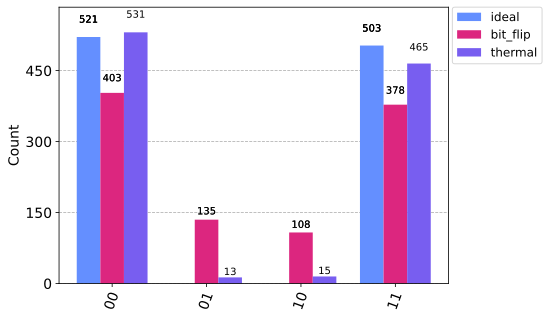

In [39]:
# Run the noisy simulation
job = execute(circuit8, simulator,
              basis_gates=noise_thermal.basis_gates,
              noise_model=noise_thermal)
result_thermal = job.result()
counts_thermal = result_thermal.get_counts(0)

# Plot noisy output
plot_histogram([counts_ideal,counts_bit_flip,counts_thermal], legend = ["ideal","bit_flip","thermal"])

<div class="alert alert-block alert-warning">
<b>Code Explained: </b>
    
This code is an example of how to simulate a noisy quantum circuit using Qiskit. The code first generates T1 and T2 values for each qubit in the circuit from a normal distribution with a mean of 50 microseconds and a standard deviation of 10 microseconds. T1 and T2 represent the decoherence times for a qubit's relaxation and dephasing processes, respectively.

The T2 values are truncated to be no greater than twice the T1 value, as this is a physical constraint on the coherence times of a qubit.

Next, the code defines the instruction times for various quantum gates, including U1, U2, U3, CX, reset, and measure gates, and creates QuantumError objects that model thermal relaxation errors for each of these gates using the T1 and T2 values generated previously.

The code then adds these errors to a noise model, which is used to simulate the noisy quantum circuit using the execute function in Qiskit. The resulting noisy output is plotted alongside the ideal and bit-flip error corrected outputs for comparison.

Overall, this code provides an example of how to incorporate realistic noise models into quantum circuit simulations using Qiskit.
    
</div>

## Conclusions


Congratulations! You have just taken your first steps towards understanding some of the foundational concepts of modern information theory. The study of probability and classical information theory provides us with the tools to quantify and understand uncertainty, randomness, and information in the world around us. By learning about ensembles, joint and marginal probabilities, and conditional probability, you have gained a deeper understanding of how information is stored and transmitted.

As you continue your journey into the world of quantum information theory, you may have many questions in your mind. What is the relationship between classical information theory and quantum information theory? How do quantum mechanics influence the way we think about information? What are some of the unique challenges and opportunities that quantum information theory presents?

As you delve deeper into these topics, keep in mind the importance of the concepts you have learned. Probability theory provides the foundation for much of modern information theory, and it is crucial to have a strong understanding of these concepts in order to make progress in the field. Take these building blocks, and use them as a foundation for your future studies. Good luck!


**EXERCISES:**
    
Today's exercises are about using Qiskit to simulate some very simple quantum phenomena.


**Exercise 1:** *Superposition principle*

Consider a spin-1/2 particle that can be in a superposition of spin-up and spin-down states. Create a quantum circuit using Qiskit that prepares the particle in the state $\frac{1}{\sqrt{2}} \begin{pmatrix} 1 \ i \end{pmatrix}$.

**Exercise 2:** *Wave-particle duality*

Unfortunately, it is not possible to simulate the double-slit experiment using Qiskit or any other quantum computing framework as it requires a physical setup and experimental apparatus. The double-slit experiment is a classic example of wave-particle duality and demonstrates the interference pattern produced by a wave-like behavior of particles.

However, we can still simulate a simplified version of the double-slit experiment using Qiskit to demonstrate the concept of interference.


Consider a quantum circuit with two qubits in an equal superposition state, and apply a Hadamard gate to each qubit. Then, apply a CNOT gate with the first qubit as the control and the second qubit as the target. Finally, measure both qubits. What is the expected outcome of the measurement, and what does it demonstrate?

**Exercise 3:**

Develop an experiment to measure the evolution of the entropy as a function of time, for each of the  models of noise presented in this notebook


**Exercise 4 (for extra credits):**

Compare the results of the numerical experiments of the previous question with a real experiment in the IBM computer. (Yes, you need to get a token!)

<div class="alert alert-success">
<b>Today's afterthoughts:</b>

Qiskit is based on "digital" quantum states, a natural extension of  the classical bit, but you have probably heard about "continuous variable states". What are your opinions about using these systems to implement a quantum computer?
</div>